In [1]:
# test harness for evaluating models on the cifar10 dataset
import sys
import numpy as np

from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

from keras import backend as K

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)



In [2]:
#check if GPU available 
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
def recall_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_(y_true, y_pred):
    precision = precision_(y_true, y_pred)
    recall = recall_(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [4]:

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.plot()
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    # save plot to file
    plt.show()
    
    
    plt.plot()
    plt.title('Classification Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    # save plot to file
    plt.show()
    
    
    plt.plot()
    plt.title('Classification F1')
    plt.plot(history.history['f1_'], color='blue', label='train')
    plt.plot(history.history['val_f1_'], color='orange', label='test')
    plt.xlabel('epoch')
    plt.ylabel('F1')
    plt.legend()
    # save plot to file
    plt.show()
    
    
    plt.plot()
    plt.title('Classification Precision')
    plt.plot(history.history['precision_'], color='blue', label='train')
    plt.plot(history.history['val_precision_'], color='orange', label='test')
    plt.xlabel('epoch')
    plt.ylabel('precision')
    plt.legend()
    # save plot to file
    plt.show()
    
    plt.plot()
    plt.title('Classification Recall')
    plt.plot(history.history['recall_'], color='blue', label='train')
    plt.plot(history.history['val_recall_'], color='orange', label='test')
    plt.xlabel('epoch')
    plt.ylabel('recall')
    plt.legend()
    # save plot to file
    plt.show()
    

In [15]:
# load train and test dataset
def load_dataset10():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def load_dataset100():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar100.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# run the test harness for evaluating a model
def run_test():
    # load dataset
    trainX, trainY, testX, testY = load_dataset10()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=40, batch_size=64, validation_data=(testX, testY), verbose=1)
    # evaluate model
    loss, accuracy, f1_score, precision, recall = model.evaluate(testX, testY, verbose=0)
    print()
    print('accuracy > %.3f' % (accuracy * 100.0))
    print('loss > %.3f' % (loss * 100.0))
    print('f1 > %.3f' % (f1_score * 100.0))
    print('precision > %.3f' % (precision * 100.0))
    print('recall > %.3f' % (recall * 100.0))

    # learning curves
    summarize_diagnostics(history)
    model.save('./model/model_CIFAR10.h5')
    print("I am done")

In [16]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', f1_, precision_, recall_])
    return model


Epoch 1/40
782/782 [==============================] - 8s 10ms/step - loss: 1.8002 - accuracy: 0.3588 - f1_: 0.1310 - precision_: 0.5782 - recall_: 0.0768 - val_loss: 1.5583 - val_accuracy: 0.4547 - val_f1_: 0.2584 - val_precision_: 0.7308 - val_recall_: 0.1584
Epoch 2/40
782/782 [==============================] - 8s 10ms/step - loss: 1.4365 - accuracy: 0.4907 - f1_: 0.3518 - precision_: 0.7155 - recall_: 0.2364 - val_loss: 1.3370 - val_accuracy: 0.5224 - val_f1_: 0.4122 - val_precision_: 0.7255 - val_recall_: 0.2900
Epoch 3/40
782/782 [==============================] - 7s 9ms/step - loss: 1.2677 - accuracy: 0.5520 - f1_: 0.4660 - precision_: 0.7411 - recall_: 0.3422 - val_loss: 1.2210 - val_accuracy: 0.5738 - val_f1_: 0.4949 - val_precision_: 0.7464 - val_recall_: 0.3722
Epoch 4/40
782/782 [==============================] - 7s 10ms/step - loss: 1.1538 - accuracy: 0.5957 - f1_: 0.5339 - precision_: 0.7637 - recall_: 0.4126 - val_loss: 1.1531 - val_accuracy: 0.5962 - val_f1_: 0.5296 - va

782/782 [==============================] - 7s 9ms/step - loss: 0.0411 - accuracy: 0.9951 - f1_: 0.9949 - precision_: 0.9965 - recall_: 0.9933 - val_loss: 1.7023 - val_accuracy: 0.6626 - val_f1_: 0.6643 - val_precision_: 0.6765 - val_recall_: 0.6527
Epoch 33/40
782/782 [==============================] - 7s 9ms/step - loss: 0.0319 - accuracy: 0.9974 - f1_: 0.9970 - precision_: 0.9980 - recall_: 0.9961 - val_loss: 1.7662 - val_accuracy: 0.6655 - val_f1_: 0.6663 - val_precision_: 0.6775 - val_recall_: 0.6557
Epoch 34/40
782/782 [==============================] - 7s 9ms/step - loss: 0.0242 - accuracy: 0.9982 - f1_: 0.9982 - precision_: 0.9988 - recall_: 0.9976 - val_loss: 1.8021 - val_accuracy: 0.6624 - val_f1_: 0.6650 - val_precision_: 0.6760 - val_recall_: 0.6545
Epoch 35/40
782/782 [==============================] - 7s 9ms/step - loss: 0.0194 - accuracy: 0.9990 - f1_: 0.9990 - precision_: 0.9993 - recall_: 0.9986 - val_loss: 1.8362 - val_accuracy: 0.6687 - val_f1_: 0.6716 - val_precision

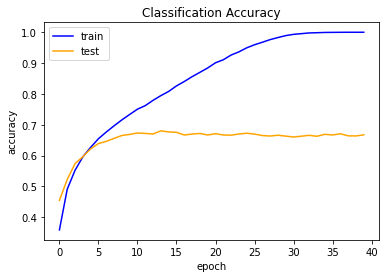

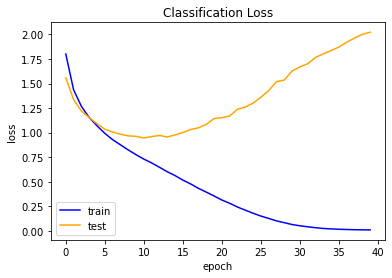

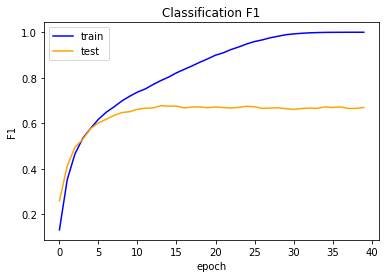

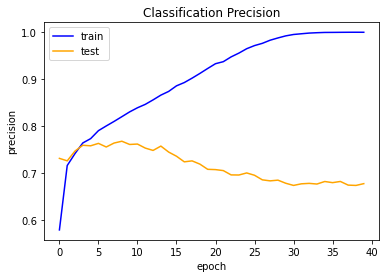

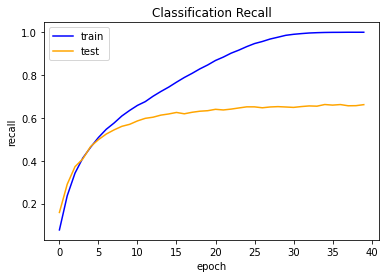

I am done


In [17]:

# entry point, run the test harness

run_test()

In [19]:
print(define_model().summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
____________________________________________